# Day 12:Population
That is you and me. Or maybe animal population from Movebank.org? Anyhow a classic theme for thematic maps.
### Thinking about population came to my unconscious that migration is one of topics to be related to. Because of that, I choose to map the population that wasn't born in México but now lives in it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import pycountry
import geopandas as gpd

Obtención de datos

In [32]:
tabla = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Estad%C3%ADstica_de_la_poblaci%C3%B3n_extranjera_en_M%C3%A9xico#cite_note-4', thousands='.')
df = tabla[0]
df.columns = df.columns.droplevel(0)
df.drop(df.tail(1).index,inplace=True)
df = df.iloc[: , :-12]
df = df.rename(columns={'País': 'nombre', '2020[3]​': 'Pob'})
df['Pob'] = df['Pob'].astype(str).astype(int)
dict = {"Estados Unidos" : 'Estados Unidos de América', "España[nota 1]​" : 'España', "Venezuela[4]​": 'Venezuela', 
        "Rumania" : 'Rumanía', "Bangladés" : 'Bangladesh'}
df=df.replace({"nombre": dict})
df.at[34,'nombre']='Países Bajos'

In [33]:
paises = pd.read_csv("https://gist.githubusercontent.com/brenes/1095110/raw/c8f208b03485ba28f97c500ab7271e8bce43b9c6/paises.csv")
paises.drop([' name', ' nom', ' iso2', ' phone_code'], axis=1, inplace=True)

Unión de datos

Apoyado en Hua Shi [Data Visualization: How To Plot A Map with Geopandas in Python?](https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)

In [34]:
merge = pd.merge(df, paises, on='nombre')
merge = merge.rename(columns={' iso3': 'CODE'})

In [35]:
merge

,Pos.,nombre,Pob,CODE
0,1,Estados Unidos de América,797266,USA
1,2,España,144553,ESP
2,4,Guatemala,56810,GTM
3,3,Venezuela,52948,VEN
4,5,Colombia,36234,COL
...,...,...,...,...
75,76,Bangladesh,116,BGD
76,77,Armenia,107,ARM
77,78,Malasia,100,MYS
78,79,Croacia,97,HRV


In [45]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']# then merge with our data 
merge2=pd.merge(world,merge, on = "CODE", how='outer')

# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
merge2["longitude"] = merge2.centroid.x
merge2["latitude"] = merge2.centroid.y
merge2 = merge2.sort_values(by='Pob',ascending=False).reset_index()

<ipython-input-45-8e999a8735a3>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merge2["longitude"] = merge2.centroid.x
<ipython-input-45-8e999a8735a3>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merge2["latitude"] = merge2.centroid.y


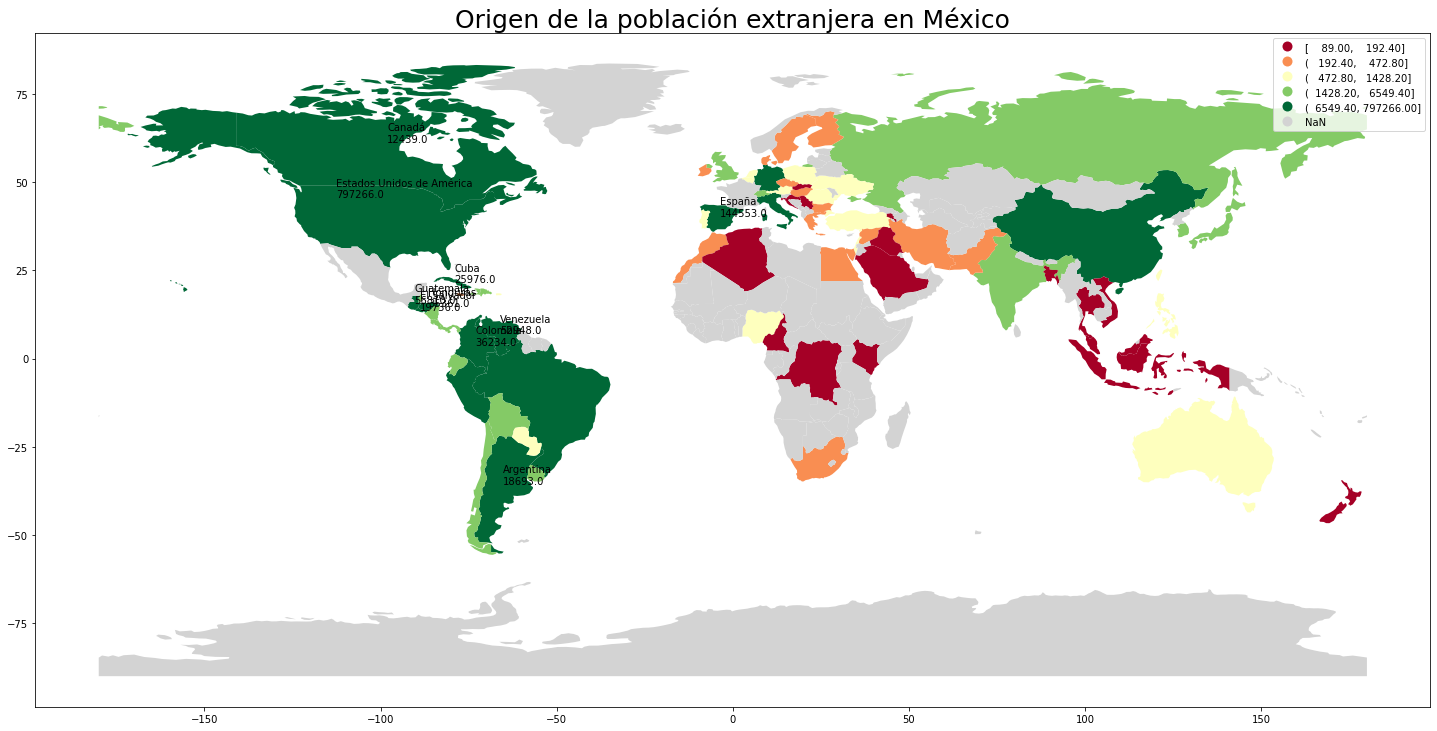

In [50]:
# plot confirmed cases world map 
merge2.plot(column='Pob', scheme="quantiles",
           figsize=(25, 20),
           legend=True,
            cmap='RdYlGn',
           missing_kwds={'color': 'lightgrey'})
plt.title("Origen de la población extranjera en México",fontsize=25)

# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge2.longitude[i]),float(merge2.latitude[i]),"{}\n{}".format(merge2.nombre[i],merge2.Pob[i]),size=10)
    
# Save figure
out_file = "Poblacion.png"
plt.savefig(out_file, dpi=300)